# Support Vector Machine

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [2]:
training_df = pd.read_csv('../Preprocess/GadgetX-NewMDCLUSTER-1/paired-csv/training.csv')
testing_df = pd.read_csv('../Preprocess/GadgetX-NewMDCLUSTER-2/paired-csv/training.csv')

In [3]:
# Preparing data for the model

X_train = training_df.drop(columns=['pair', 'will_merge']).values
X_test = testing_df.drop(columns=['pair', 'will_merge']).values
y_train = training_df['will_merge'].values
y_test = testing_df['will_merge'].values

<AxesSubplot:>

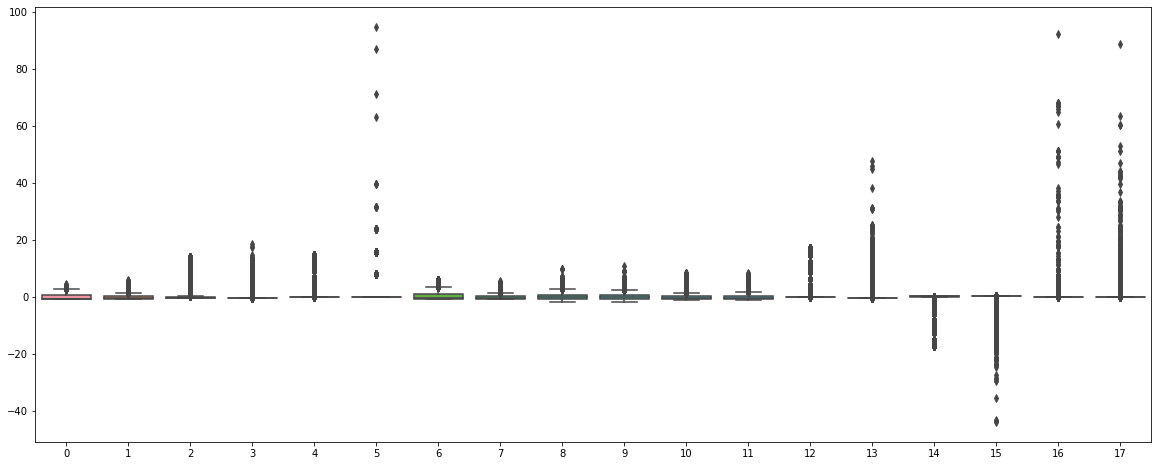

In [6]:
# Standardize data features to use zero mean normalisation

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
fig, ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=X_train, ax=ax)

In [7]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [9]:
predict = svc.predict(X_test)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, predict)))

Model accuracy score with default hyperparameters: 0.6822


In [10]:
cm = confusion_matrix(y_test, predict)

              precision    recall  f1-score   support

           0       0.61      1.00      0.76     35145
           1       0.99      0.37      0.54     35145

    accuracy                           0.68     70290
   macro avg       0.80      0.68      0.65     70290
weighted avg       0.80      0.68      0.65     70290



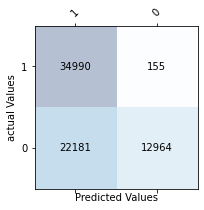

In [12]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i,j], va='center', ha='center')
classes=["1", "0"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Values',)
plt.ylabel('actual Values',);
print(classification_report(y_test, predict))

<ipython-input-13-486c0cdf8555>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect(1);


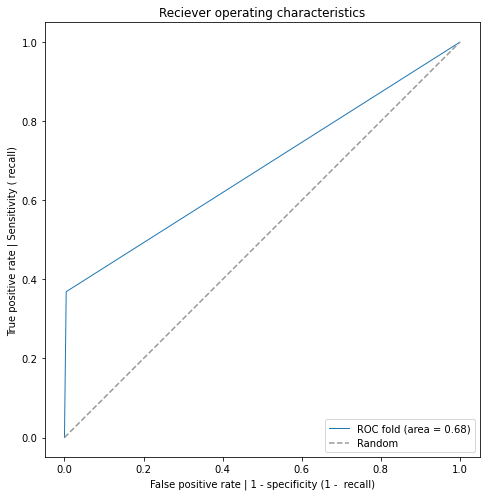

In [13]:
# Plot the rciever opertaing characteristic curve (ROC)
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10,8))
#probas_ = model.predict(X_valid['speed'])
fpr, tpr, thresholds = roc_curve(y_test, predict)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr, lw=1, label='ROC fold (area = %0.2f)' %(roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate | 1 - specificity (1 -  recall)')
plt.ylabel('True positive rate | Sensitivity ( recall)')
plt.title('Reciever operating characteristics')
plt.legend(loc="lower right")
plt.axes().set_aspect(1);